In [1]:

import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [9]:
# Carga el archivo CSV en un DataFrame
df_hom_kpi= pd.read_csv('data\df_homicidios.csv')

In [10]:

df_hom_kpi.sample(10)

,ID_HECHO,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,XY (CABA),LONGITUD,LATITUD,VEHICULO_ACUSADO
666,2021-0068,1,2021-08-15,6.0,AVENIDA,11.0,Point (94651.77324467 101953.65862250),-58.521612,-34.611645,OBJETO FIJO
430,2019-0013,1,2019-02-20,7.0,CALLE,7.0,Point (102701.07793891 98301.55899449),-58.433838,-34.644577,AUTO
178,2017-0047,1,2017-04-23,6.0,AVENIDA,8.0,Point (99648.31069819 95261.11808541),-58.467137,-34.671988,AUTO
677,2021-0079,1,2021-10-25,3.0,CALLE,3.0,Point (104940.36054625 103137.08602294),-58.409441,-34.600979,AUTO
127,2016-0160,1,2016-12-06,5.0,AUTOPISTA,9.0,Point (94867.91408532 99212.26216105),-58.519272,-34.636358,OBJETO FIJO
637,2021-0039,1,2021-05-15,12.0,AVENIDA,9.0,Point (96262.45081883 97363.01985851),-58.504071,-34.653034,AUTO
108,2016-0138,1,2016-10-27,20.0,AVENIDA,13.0,Point (100385.69739031 107770.04028070),-58.459097,-34.559227,CARGAS
369,2018-0095,1,2018-08-26,0.0,AVENIDA,9.0,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,AUTO
148,2017-0009,1,2017-01-16,13.0,AUTOPISTA,5.0,Point (104341.1368196 100202.74363294),-58.415959,-34.627433,CARGAS
311,2018-0037,1,2018-04-18,18.0,AVENIDA,2.0,Point (105923.35790409 103271.83194351),-58.398726,-34.599760,CARGAS


In [11]:
df_hom_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_HECHO          696 non-null    object 
 1   N_VICTIMAS        696 non-null    int64  
 2   FECHA             696 non-null    object 
 3   HORA              695 non-null    float64
 4   TIPO_DE_CALLE     696 non-null    object 
 5   COMUNA            696 non-null    float64
 6   XY (CABA)         682 non-null    object 
 7   LONGITUD          684 non-null    float64
 8   LATITUD           684 non-null    float64
 9   VEHICULO_ACUSADO  673 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 54.5+ KB



#### KPI Nro. 1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

Dato: censo 2022. Población total CABA: 3.120.612 - Fuente: https://censo.gob.ar/index.php/datos_provisionales/

In [15]:
# Filtrar los datos para el último semestre (julio - diciembre de 2021)
filtro_ultimo_semestre = (df_hom_kpi['FECHA'] >= '2021-07-01') & (df_hom_kpi['FECHA'] <= '2021-12-31')
df_ultimo_semestre = df_hom_kpi[filtro_ultimo_semestre]

# Filtrar los datos para el semestre anterior (enero - junio de 2021)
filtro_semestre_anterior = (df_hom_kpi['FECHA'] >= '2021-01-01') & (df_hom_kpi['FECHA'] <= '2021-06-30')
df_semestre_anterior = df_hom_kpi[filtro_semestre_anterior]

# Calcular el número de víctimas fatales en cada semestre
num_victimas_ultimo_semestre = df_ultimo_semestre['N_VICTIMAS'].sum()
num_victimas_semestre_anterior = df_semestre_anterior['N_VICTIMAS'].sum()

print("julio-diciembre 2021 :", num_victimas_ultimo_semestre, ("victimas"))
print("enero-junio 2021 :", num_victimas_semestre_anterior, ("victimas") )


julio-diciembre 2021 : 42 victimas
enero-junio 2021 : 55 victimas


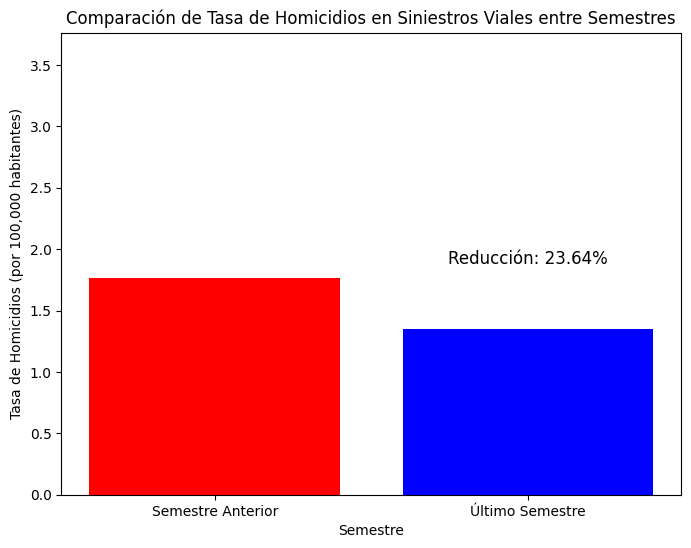

Se ha cumplido el objetivo de reducción del 10%.


In [16]:
# Datos
poblacion_total = 3120612
homicidios_ultimo_semestre = 42
homicidios_semestre_anterior = 55

# Calcular la tasa de homicidios en siniestros viales del último semestre
tasa_homicidios_ultimo_semestre = (homicidios_ultimo_semestre / poblacion_total) * 100000

# Calcular la tasa de homicidios en siniestros viales del semestre anterior
tasa_homicidios_semestre_anterior = (homicidios_semestre_anterior / poblacion_total) * 100000

# Calcular la diferencia porcentual
diferencia_porcentual = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100

# Graficar la diferencia porcentual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Semestre Anterior', 'Último Semestre'], [tasa_homicidios_semestre_anterior, tasa_homicidios_ultimo_semestre], color=["#6A5ACD", 'blue'])
plt.title('Comparación de Tasa de Homicidios en Siniestros Viales entre Semestres')
plt.xlabel('Semestre')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)')
plt.text(1, tasa_homicidios_ultimo_semestre + 0.5, f'Reducción: {diferencia_porcentual:.2f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.ylim(0, max(tasa_homicidios_ultimo_semestre, tasa_homicidios_semestre_anterior) + 2)
plt.show()

# Verificar si se cumplió la reducción del 10%
if diferencia_porcentual >= 10:
    print('Se ha cumplido el objetivo de reducción del 10%.')
else:
    print('No se ha cumplido el objetivo de reducción del 10%.')